# Try again with CNN with Gramian Angular Difference Field
# Produce a dataset containing EventID that correspond to ...

In [1]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import sys

# plt.rcParams['figure.figsize'] = 12.0, 8.0

# arguments = sys.argv
# Run = arguments[0]
# SubRun = arguments[1]
# SubSubRun = arguments[2]

file = "PSDPara1_less_15.root"#.format(Run,SubRun,SubSubRun)
# file = "Run009/Run009-070-001.root"#.format(Run,SubRun,SubSubRun)
data = "PMTALL"
tree = "tree"
energy = "Energy"

CPU times: user 700 ms, sys: 204 ms, total: 904 ms
Wall time: 1.49 s


In [2]:
%%time
from pyts.transformation import GADF, GASF

from sklearn.preprocessing import normalize
from root_numpy import tree2array,array2tree,array2root
import ROOT
import keras

# Slightly different , just the first 4096 of waveform(full 4480, for ease of operations)
def reader_pmt(path):
    extra = np.arange(4096, 4480)
    x_file = ROOT.TFile(path)
    x_tree = x_file.Get("tree")
    x_pmtall = tree2array(x_tree, branches="PMTALL")
    x = np.delete(x_pmtall, extra, axis=1)
    return x

def viewer(x):
    y = abs(x-15200)
    z = normalize(y, norm="l2")
    return z

import random
def generator(path):
    while 1:
        pmtall = reader_pmt(path)
        length = len(pmtall)
        gasf = GASF(image_size=64, overlapping=False, scale='-1')
        for i in range(length):
            p = np.expand_dims(pmtall[i],axis=0)
            p = gasf.transform(p)
            p = np.expand_dims(p,axis=3)
            yield p
            
test = generator(file)
print(next(test).shape)

plt.figure()


Welcome to JupyROOT 6.10/02


Using TensorFlow backend.


(1, 64, 64, 1)
CPU times: user 7.46 s, sys: 1.79 s, total: 9.25 s
Wall time: 11.9 s


##### label = 0

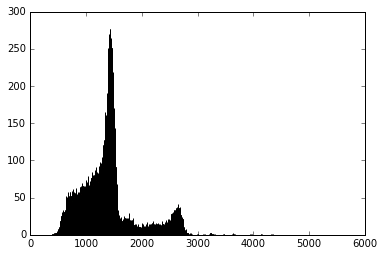

Starts picking!
picked 7 events!


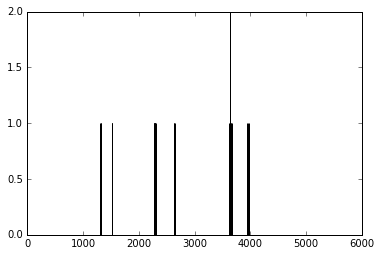

CPU times: user 2min 26s, sys: 26.3 s, total: 2min 53s
Wall time: 2min 9s


2018-01-27 14:43:16.487655: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX


In [3]:
%%time

rfile = ROOT.TFile(file)
intree = rfile.Get(tree)
treer = tree2array(intree)
# pmtall = tree2array(intree, branches=data)
energy = tree2array(intree, branches=energy)

plt.figure()
plt.hist(energy,bins=np.arange(0,6000,5))
plt.show()

from keras.models import load_model

model = load_model("CNN_256_256_6_classes_noLS.h5")

steps=len(energy)

pred = model.predict_generator(generator(file),steps=steps)

indices = np.argmax(pred,axis=1)

print("Starts picking!")
picked0 = []
for i in range(len(energy)):
    if indices[i]==0 and pred[i][0]: #and pred[i][0]>0.9:
        picked0.append(i)
#         plt.figure()
#         plt.plot(np.arange(4096),pmtall[i])
#         plt.show()

# histogramming = treer[picked]
# array2root(histogramming, "PSD15out.root","tree")#.format(Run,SubRun,SubSubRun), "tree")

print("picked",len(picked0), "events!")
plt.figure()
plt.hist(energy[picked0],bins=np.arange(0,6000,5))
plt.show()

In [24]:
# Augment pmtall waveform for better viewing frame instead of inverted.
pmtall = reader_pmt(file)
pmtall = viewer(pmtall)


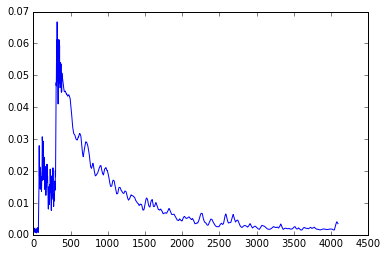

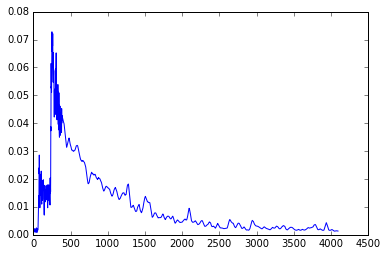

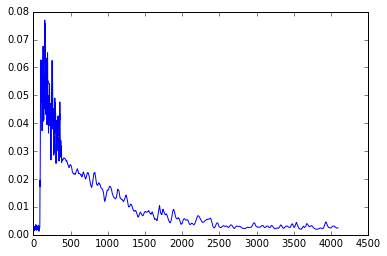

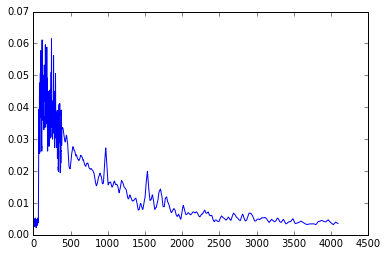

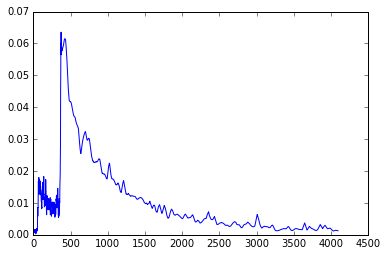

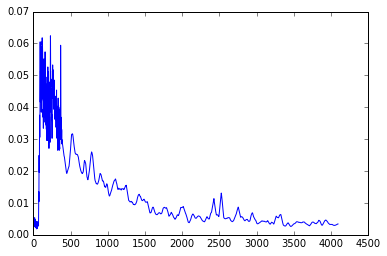

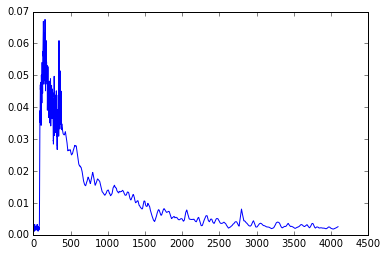

In [26]:
for i in range(len(picked0)):
#     k = np.random.randint(len(picked0))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked0[i]])
    plt.show()
    
# plt.figure()
# plt.plot(np.arange(4096),pmtall[picked0[0]])
# plt.savefig("waveform.png")
# plt.show()

# plt.figure()
# plt.plot(np.arange(4096),pmtall[picked0[i]])
# plt.show()

##### label = 1

Starts picking!


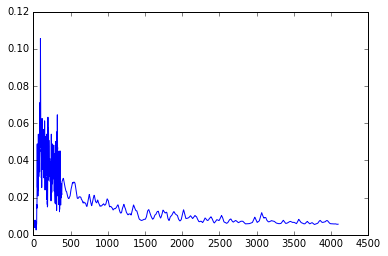

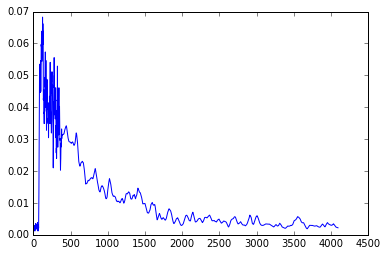

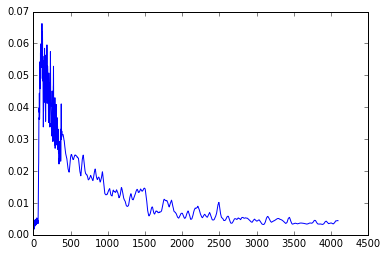

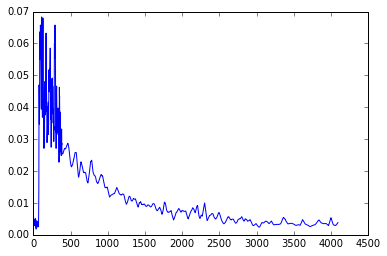

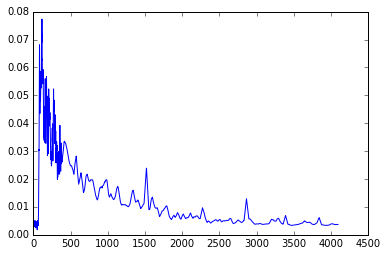

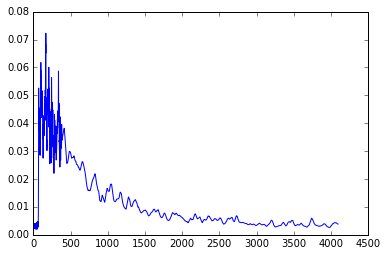

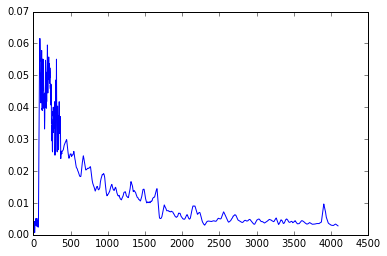

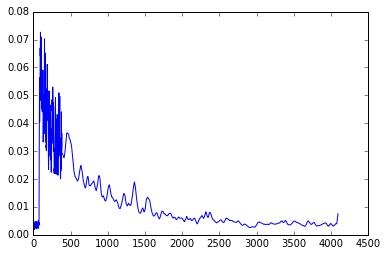

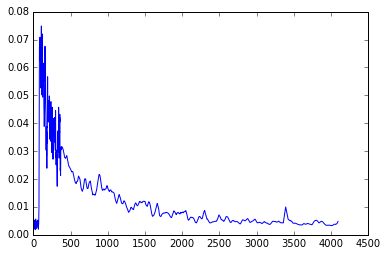

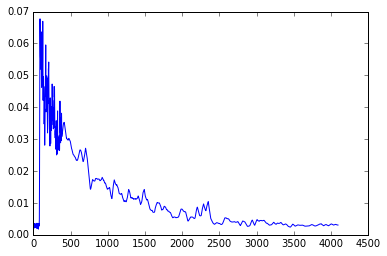

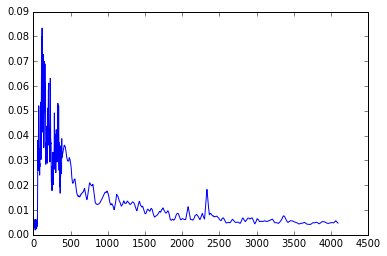

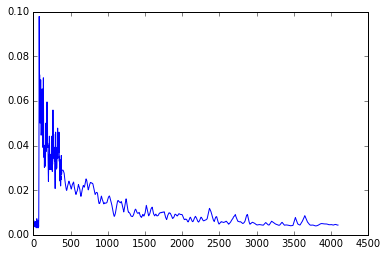

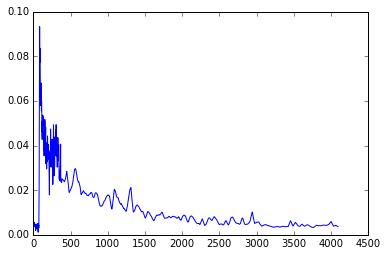

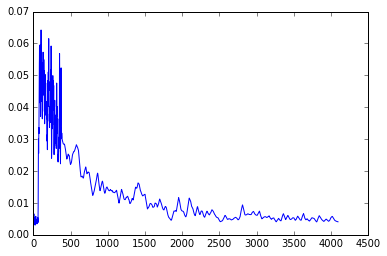

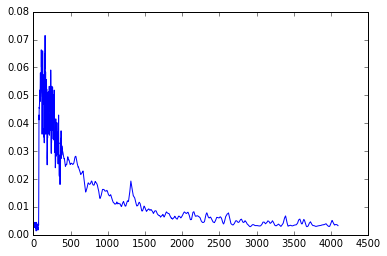

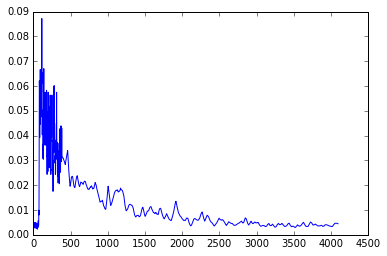

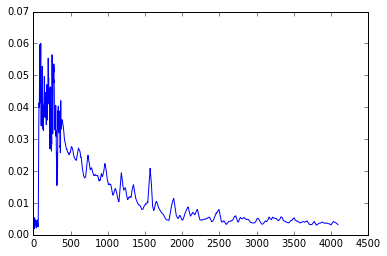

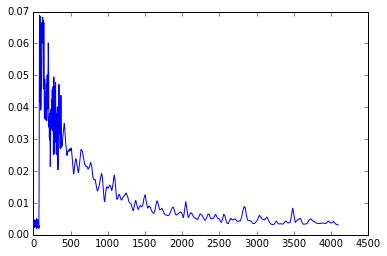

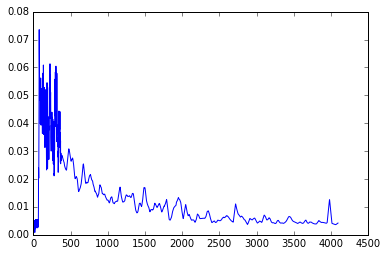

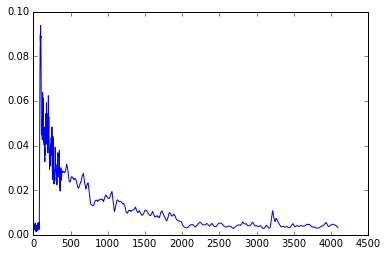

picked 14161 events!


In [27]:
print("Starts picking!")
picked1 = []
for i in range(len(energy)):
    if indices[i]==1 and pred[i][1]: #and pred[i][0]>0.9:
        picked1.append(i)

for i in range(20):
    k = np.random.randint(len(picked1))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked1[k]])
    plt.show()
print("picked",len(picked1), "events!")


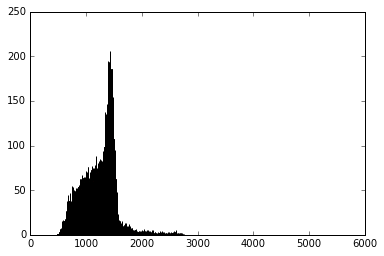

In [28]:
plt.figure()
plt.hist(energy[picked1],bins=np.arange(0,6000,5))
plt.show()

##### label = 2

Starts picking!


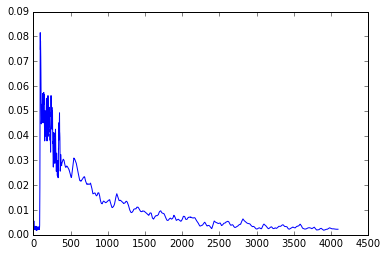

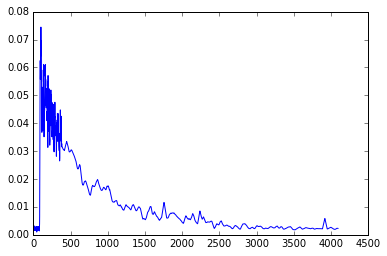

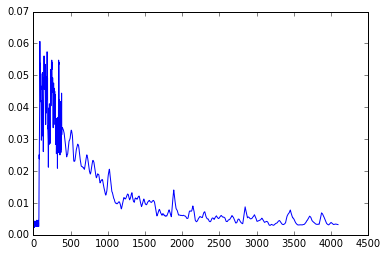

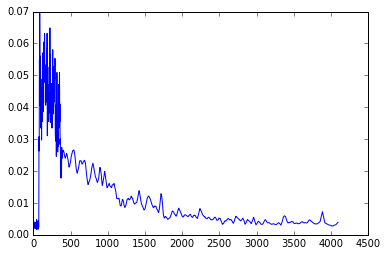

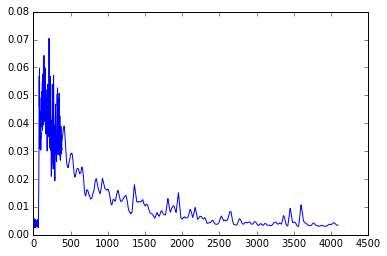

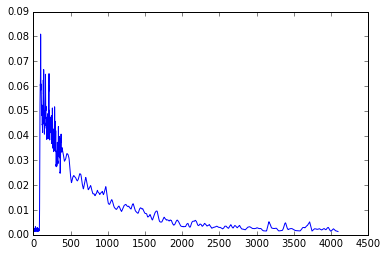

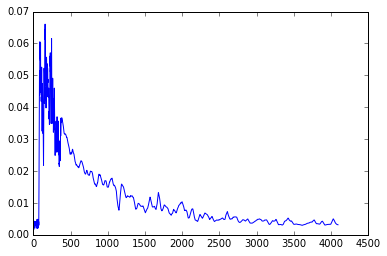

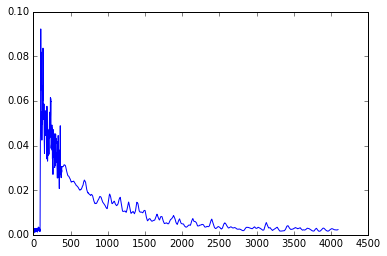

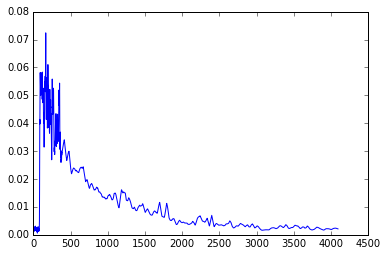

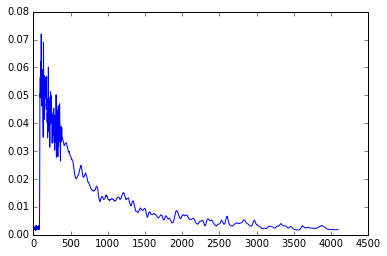

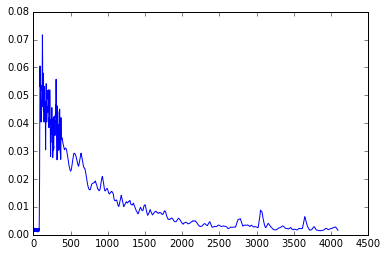

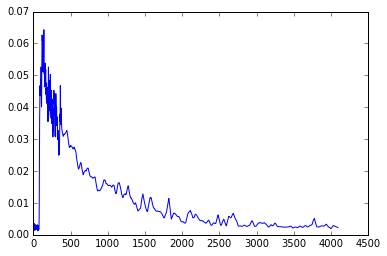

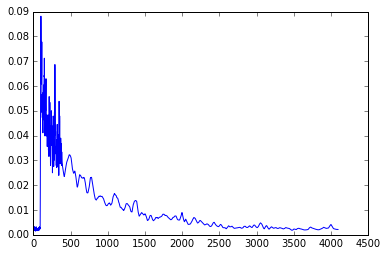

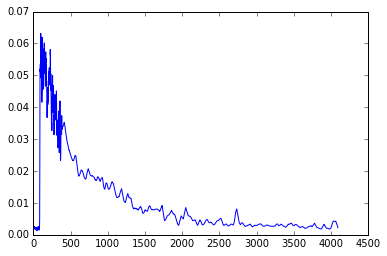

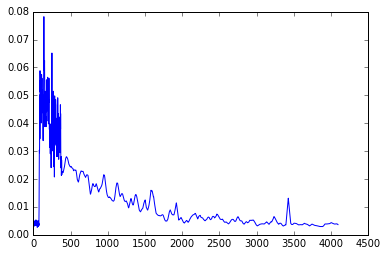

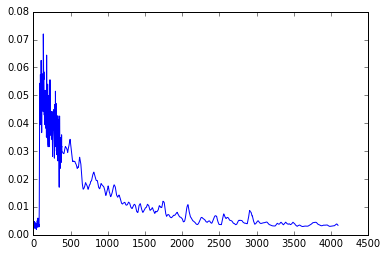

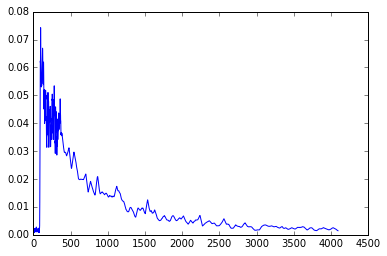

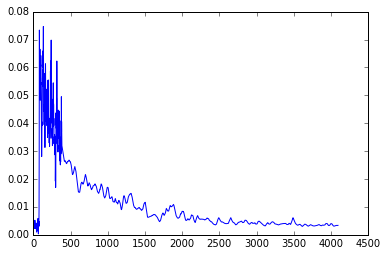

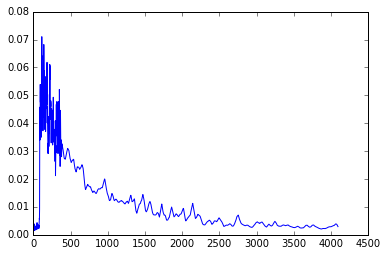

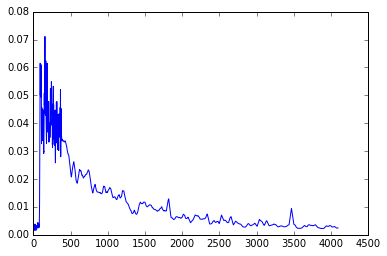

picked 3462 events!


In [29]:
print("Starts picking!")
picked2 = []

for i in range(len(energy)):
    if indices[i]==2 and pred[i][2]:
        picked2.append(i)

for i in range(20):
    k = np.random.randint(len(picked2))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked2[k]])
    plt.show()
print("picked",len(picked2), "events!")

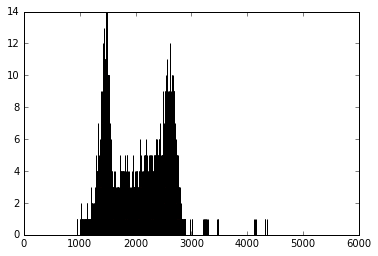

In [30]:
plt.figure()
plt.hist(energy[picked2],bins=np.arange(0,6000,1))
plt.show()

##### label = 3

Starts picking!


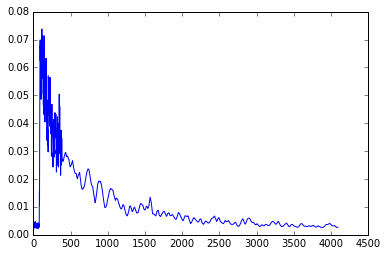

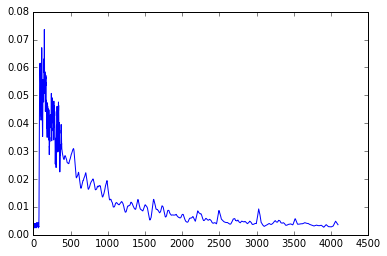

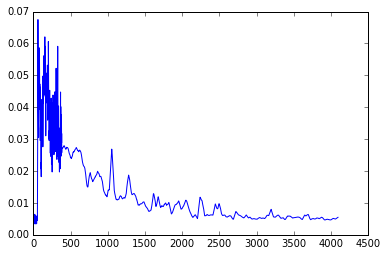

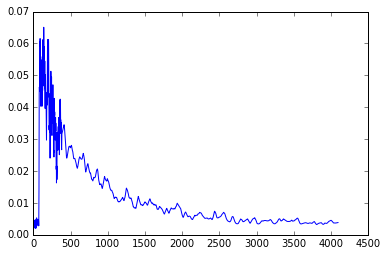

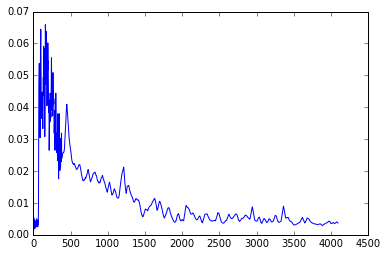

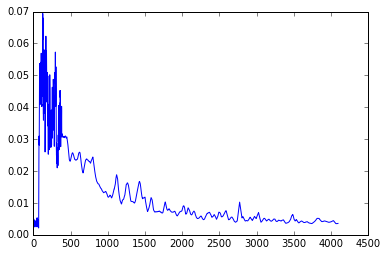

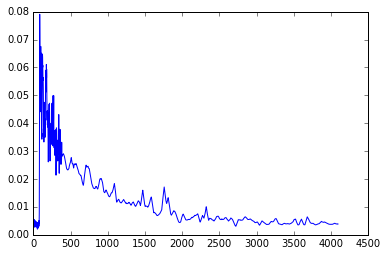

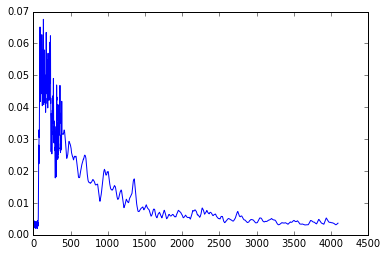

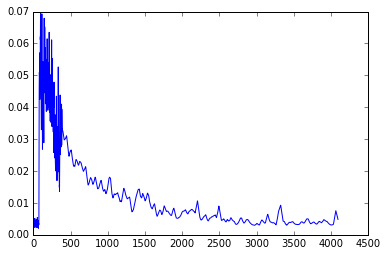

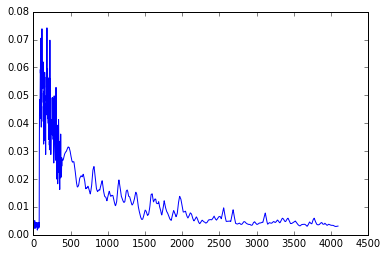

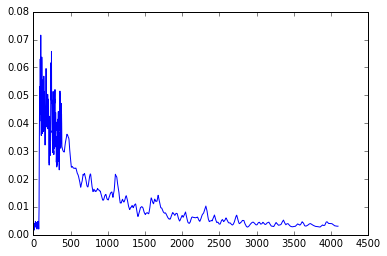

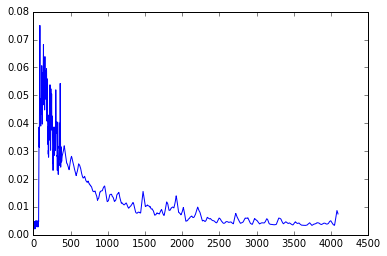

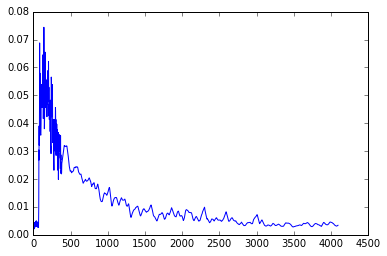

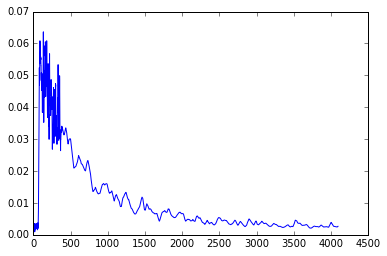

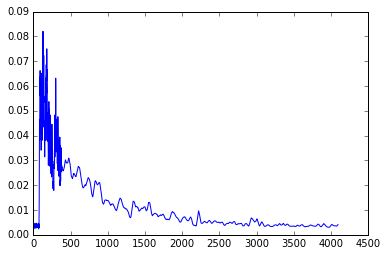

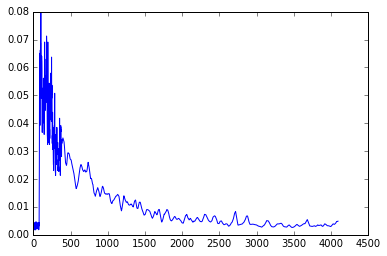

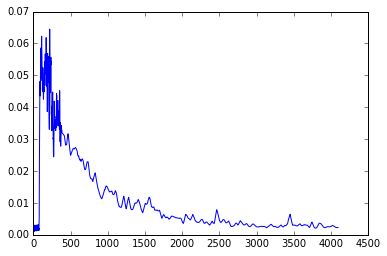

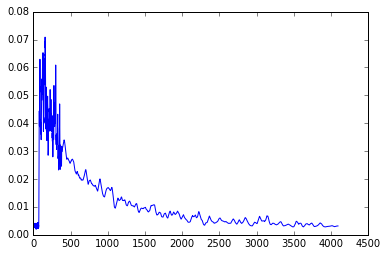

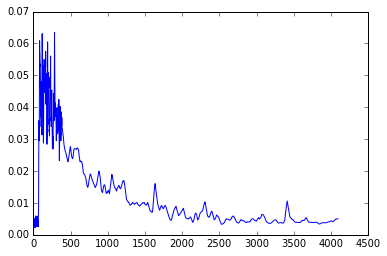

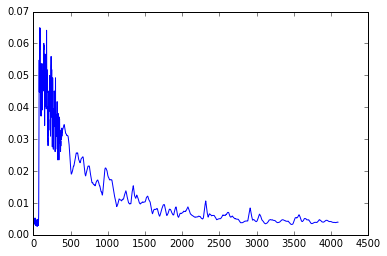

picked 2086 events!


In [31]:
print("Starts picking!")
picked3 = []
for i in range(len(energy)):
    if indices[i]==3 and pred[i][3]:
        picked3.append(i)
for i in range(20):
    k = np.random.randint(len(picked3))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked3[k]])
    plt.show()
print("picked",len(picked3), "events!")

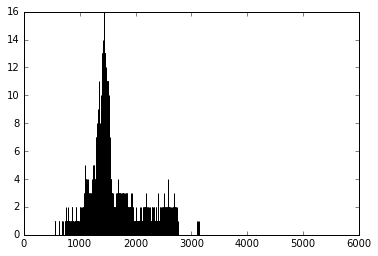

In [32]:
plt.figure()
plt.hist(energy[picked3],bins=np.arange(0,6000,1))
# plt.yscale("log")
plt.show()

##### label = 4

Starts picking!


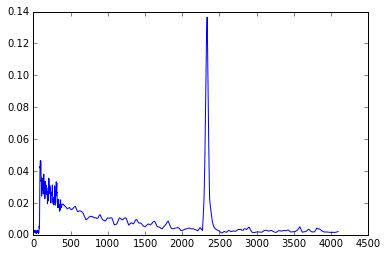

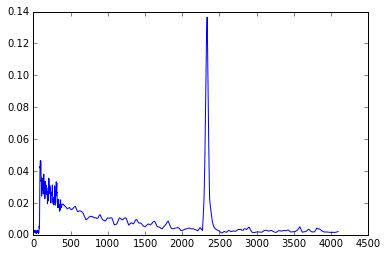

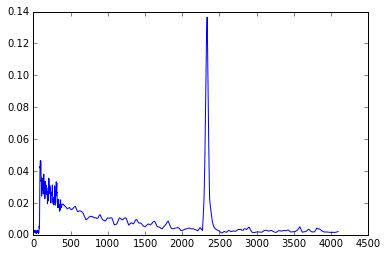

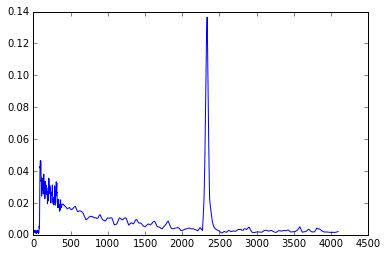

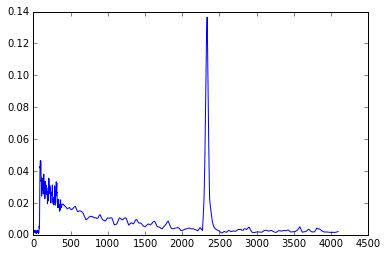

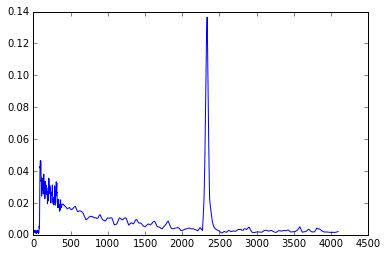

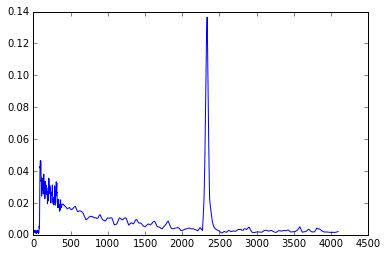

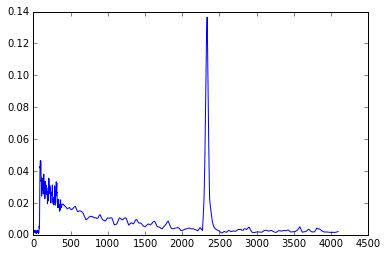

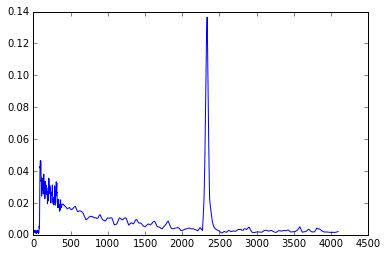

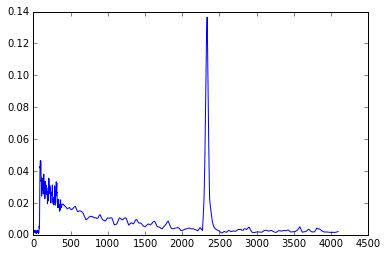

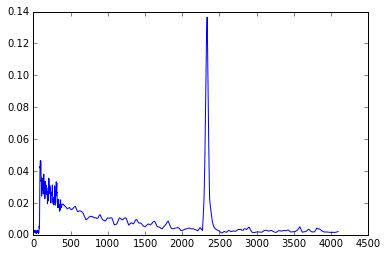

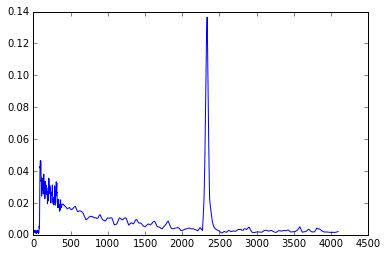

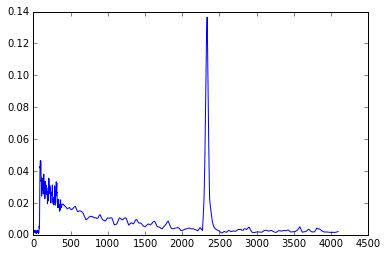

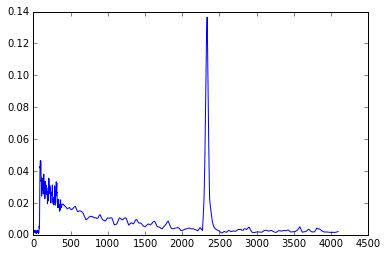

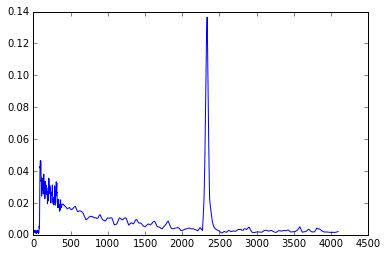

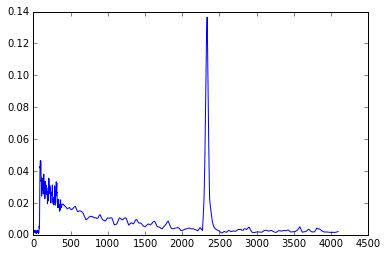

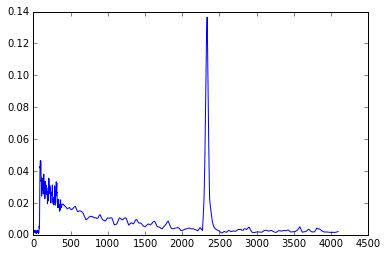

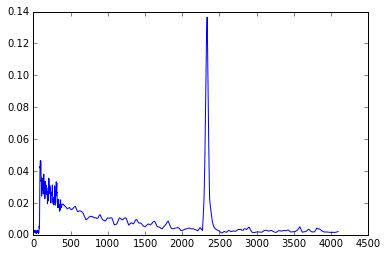

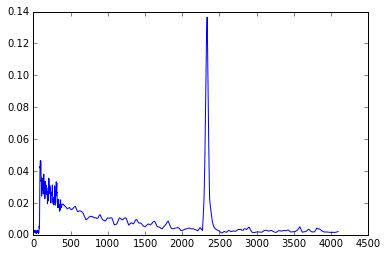

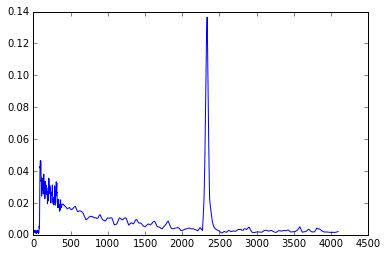

picked 1 events!


In [33]:
print("Starts picking!")
picked4 = []
for i in range(len(energy)):
    if indices[i]==4 and pred[i][4]:
        picked4.append(i)
for i in range(20):
    k = np.random.randint(len(picked4))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked4[k]])
    plt.show()

print("picked",len(picked4), "events!")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:5882: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1 x 3)
  '(shape is %d x %d)' % inp.shape[::-1])


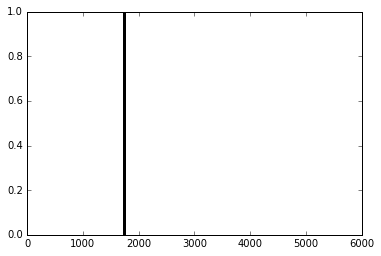

In [34]:
plt.figure()
plt.hist(energy[picked4],bins=np.arange(0,6000,5))
# plt.yscale("log")
plt.show()

##### label = 5

Starts picking!


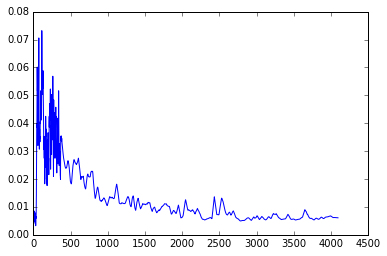

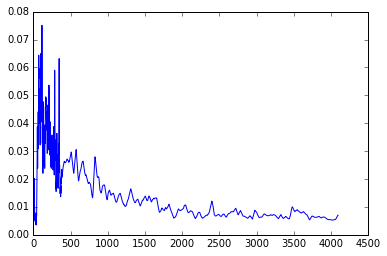

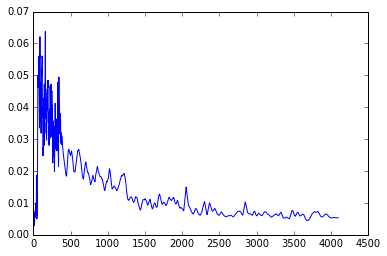

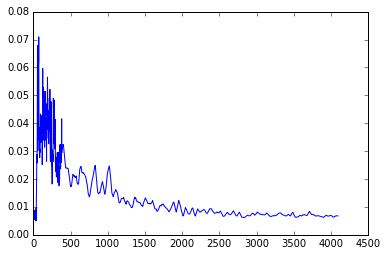

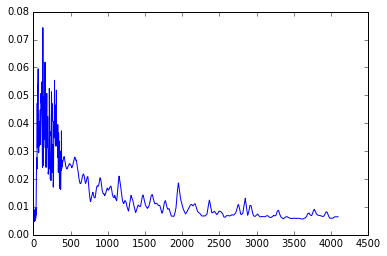

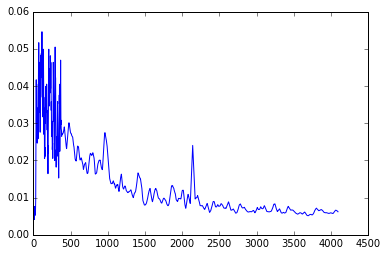

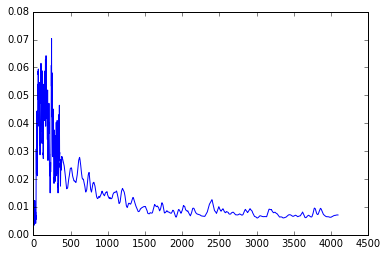

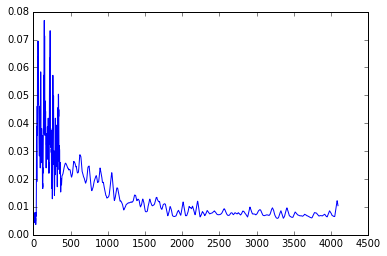

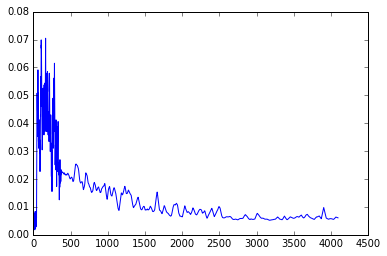

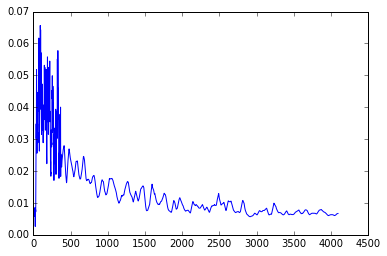

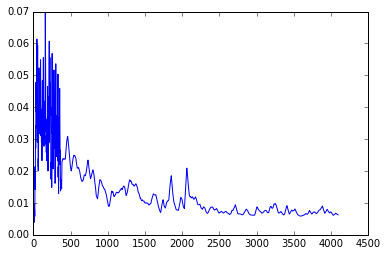

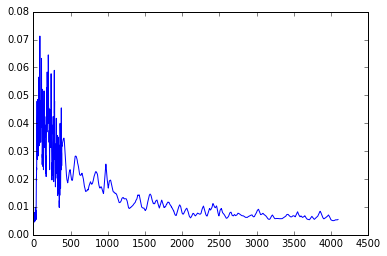

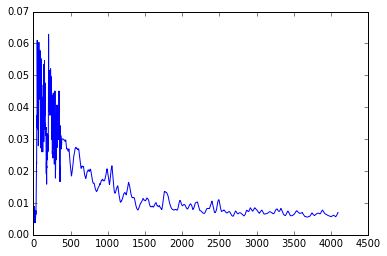

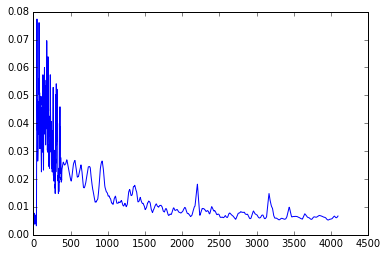

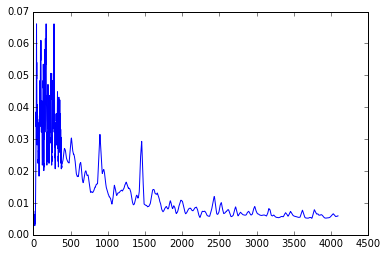

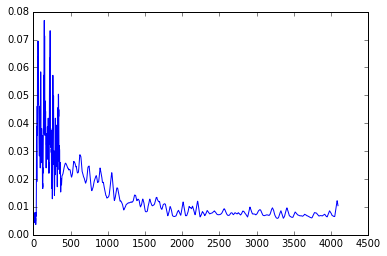

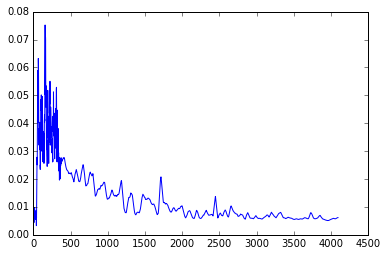

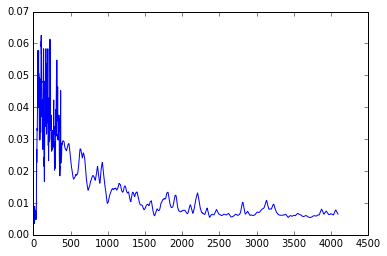

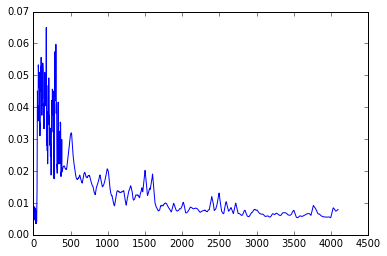

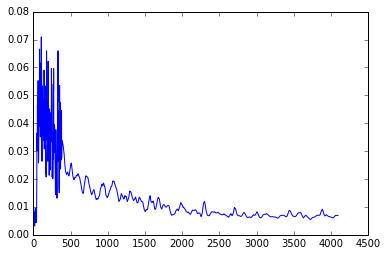

picked 720 events!


In [35]:
print("Starts picking!")
picked5 = []
for i in range(len(energy)):
    if indices[i]==5 and pred[i][5]:
        picked5.append(i)
for i in range(20):
    k = np.random.randint(len(picked5))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked5[k]])
    plt.show()

print("picked",len(picked5), "events!")

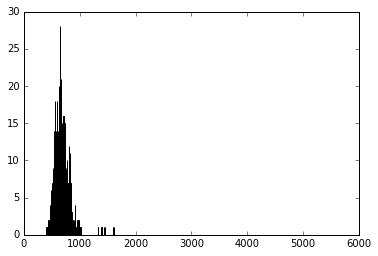

In [36]:
plt.figure()
plt.hist(energy[picked5],bins=np.arange(0,6000,5))
# plt.yscale("log")
plt.show()

##### label = 6

Starts picking!


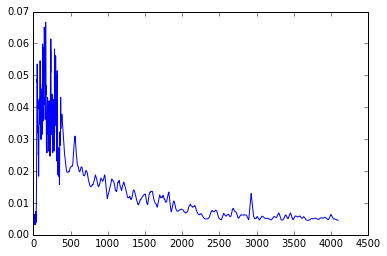

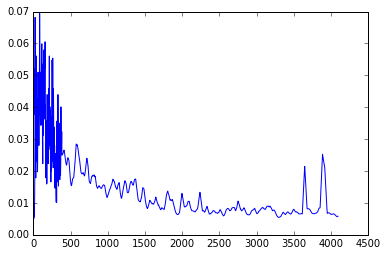

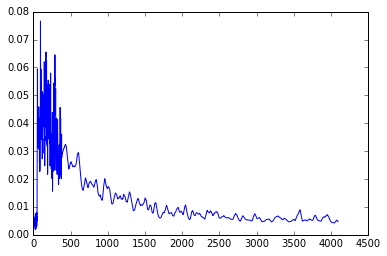

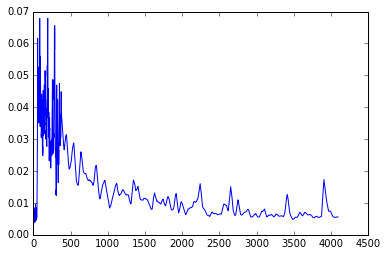

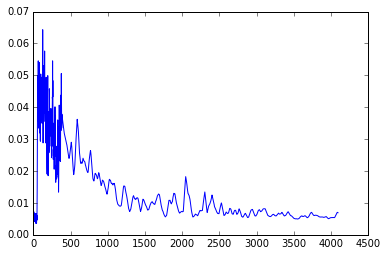

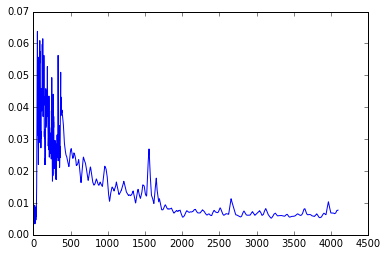

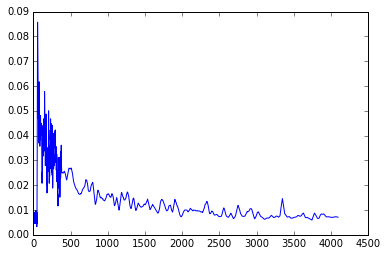

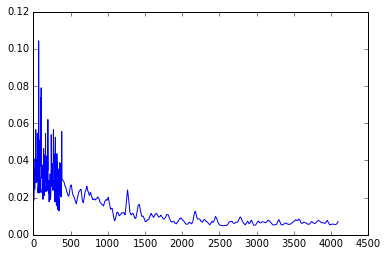

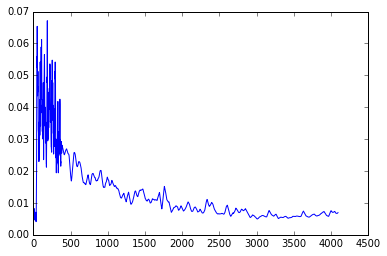

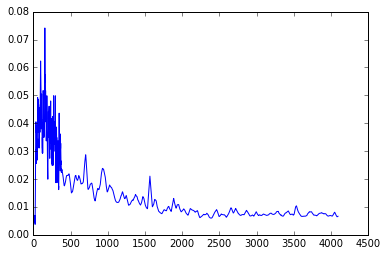

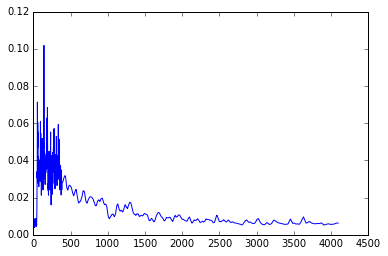

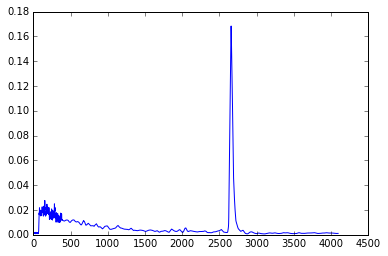

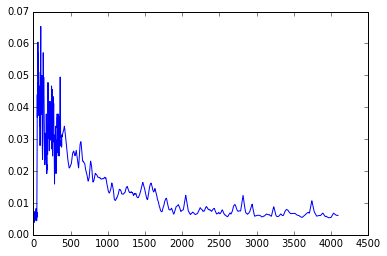

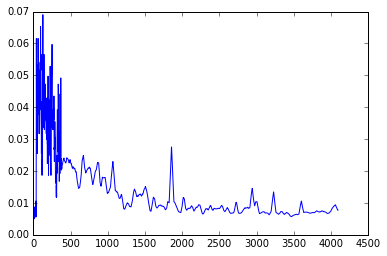

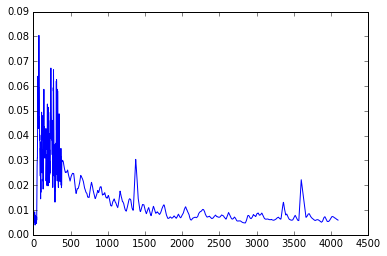

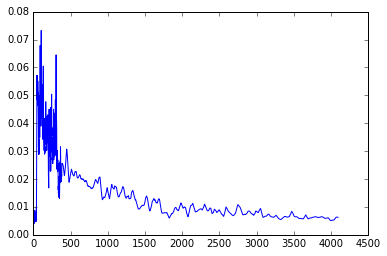

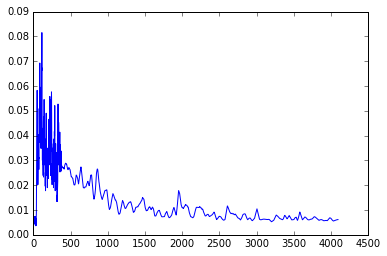

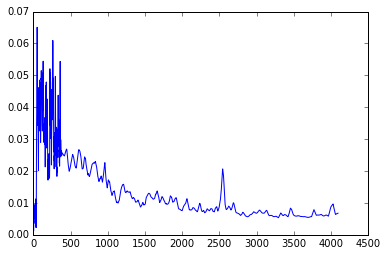

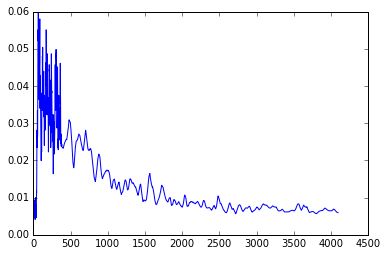

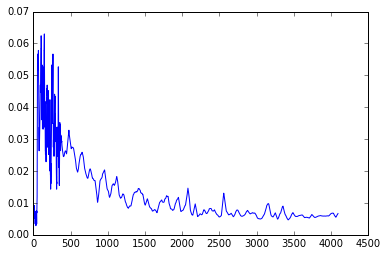

picked 817 events!


In [16]:
print("Starts picking!")
picked6 = []
for i in range(len(energy)):
    if indices[i]==6 and pred[i][6]:
        picked6.append(i)
for i in range(20):
    k = np.random.randint(len(picked6))
    plt.figure()
    plt.plot(np.arange(4096),pmtall[picked6[k]])
    plt.show()

print("picked",len(picked6), "events!")

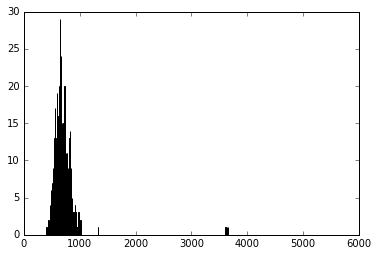

In [17]:
plt.figure()
plt.hist(energy[picked6],bins=np.arange(0,6000,5))
# plt.yscale("log")
plt.show()

### Combined all histogram

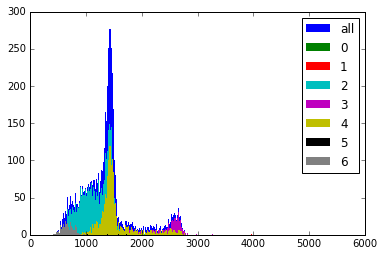

In [20]:
plt.figure()
plt.hist(energy[:,1],bins=np.arange(0,6000,5),edgecolor='none',label="all")
plt.hist(energy[picked0,1],bins=np.arange(0,6000,5),edgecolor='none',label="0")
plt.hist(energy[picked1,1],bins=np.arange(0,6000,5),edgecolor='none',label="1")
plt.hist(energy[picked2,1],bins=np.arange(0,6000,5),edgecolor='none',label="2")
plt.hist(energy[picked3,1],bins=np.arange(0,6000,5),edgecolor='none',label="3")
plt.hist(energy[picked4,1],bins=np.arange(0,6000,5),edgecolor='none',label="4")
plt.hist(energy[picked5,1],bins=np.arange(0,6000,5),edgecolor='none',label="5")
plt.hist(energy[picked6,1],bins=np.arange(0,6000,5),edgecolor='none',label="6",color="grey")
# plt.yscale("log")
plt.legend()
plt.show()

# Rewrite some portion

In [ ]:
%%time
# pmt_all_length = 4480

arguments = sys.argv
Run = arguments[0]
SubRun = arguments[1]
SubSubRun = arguments[2]

file = "Run{}/Run{}-{}-{}.root".format(Run,SubRun,SubSubRun)
data = "PMTALL"
tree = "tree"

pred = model.predict_generator(PMTALL,batch_size=200,verbose=1)


# output = open("DoubleP/Run{}-{}-{}.txt".format(Run,SubRun,SubSubRun), "w") 
# histo = ""

# def NORM(file, tree, data):
#     pmtall = read_root(file, tree, columns=[data],flatten=[data])
#     num_entries, w = pmtall.shape
#     num_entries = int(num_entries/pmt_all_length)
#     x = pmtall.PMTALL.values.reshape(num_entries, pmt_all_length)
#     x_abs = abs(x - 15200)
#     extra = np.arange(4160, pmt_all_length)
#     x_mod = np.delete(x_abs, extra, axis=1)
#     x_nor = normalize(x_mod, norm="l1")
#     return x_nor

# def read_para(x,tree,para):
#     ene = read_root(x, tree, columns=[para], flatten=[para])
#     num_entries, w = ene.shape
#     num_entries = int(num_entries/3)
#     y = ene.Energy.values.reshape(num_entries,3)
#     y_1 = np.expand_dims(y[:,1],axis=1)
#     y_1 = np.rint(y_1)
#     return y_1

from keras.models import load_model

model = load_model("CNN_d.h5")

PMTALL = NORM(file, tree, data)
# PMTALL = np.expand_dims(PMTALL,axis=2)
steps = len(PMTALL)
pred = model.predict_generator(PMTALL,batch_size=200,verbose=1)

del PMTALL

indices = np.argmax(pred,axis=1)

eventid = read_root(file, tree, columns=["EventID"], flatten=["EventID"])

energy = read_root(file, tree, columns=["Energy"],flatten=["Energy"])
l,h = energy.shape
li=int(l/3)
def reshape_Energy(x,n,l):
    return x.Energy.values.reshape(n,l)
energy = reshape_Energy(energy,li,3)
Energy = energy[:,1]

del energy

Energy = np.expand_dims(Energy, axis=1)
histogramming = np.array([])

for i in range(len(pred)):
    if indices[i]==0:
        output.write("{} {} {} {}".format(Run,SubRun,SubSubRun,EventID[i]))
        histogramming = np.concatenate((histogramming, Energy[i]), axis=0)
        
histogramming.to_root('Run{}-{}-{}.root'.format(Run,SubRun,SubSubRun), key='tree')
        
output.close()
